# CNN

In [1]:
import numpy as np
import pandas as pd
import random
import time 

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras import losses
from keras import regularizers
from keras.constraints import max_norm

from sklearn.cross_validation import cross_val_score

random.seed(7)

%matplotlib inline
import matplotlib.pyplot as plt

from src.utils import *

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X_train_pd = pd.read_csv('data/challenge_fichier_dentrees_dentrainement_challenge_nba/train.csv')
Y_train_pd = pd.read_csv('data/challenge_fichier_de_sortie_dentrainement_challenge_nba.csv', sep=';')
# X_test_pd = pd.read_csv('data/challenge_fichiers_dentrees_de_test_challenge_nba/test.csv')

In [3]:
# X_train, Y_train, X_val, Y_val = preprocess(X_train_pd, Y_train_pd, 0.8)

# np.save('data/X_train', X_train)
# np.save('data/Y_train', Y_train)
# np.save('data/X_val', X_val)
# np.save('data/Y_val', Y_val)

X_train = np.load('data/X_train.npy')
X_val = np.load('data/X_val.npy')
Y_train = np.load('data/Y_train.npy')
Y_val = np.load('data/Y_val.npy')

In [4]:
nb_games_train = len(X_train)
nb_games_val = len(X_val)

# Reshpe data to create images

In [5]:
X_train = X_train.reshape((nb_games_train, 11, 1440, 1), order = 'F')
X_val = X_val.reshape((nb_games_val, 11, 1440, 1), order = 'F')

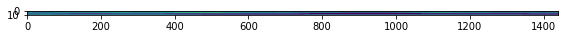

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(X_train[1, :].reshape(11,1440), interpolation='nearest')
plt.tight_layout()

In [7]:
Y_train = np_utils.to_categorical(Y_train, 2)
Y_val = np_utils.to_categorical(Y_val, 2)

# Training architectures

In [8]:
def train_and_test(model, X_train, Y_train, X_val, Y_val, epochs, batch_size, verbose):
    start = time.time()
    training = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, verbose = verbose)
    end = time.time()

    print('TRAINING')
    print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
    print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
    print('Training time: {}'.format(end - start))

    print('\nTEST')
    evalu = conv_model.evaluate(X_val, Y_val)
    print('Loss: {}'.format(evalu[0]))
    print('Accuracy: {}'.format(evalu[1]))
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))

    ax1.plot(training.history['loss'])
    ax1.set_title('LOSS as a function of iterations')

    ax2.plot(training.history['acc'])
    ax2.set_title('ACCURACY as a function of iterations')

TRAINING
Loss at last iteration: 0.44784129011939106
Accuracy at last iteration: 0.7823061629981691
Training time: 560.0307059288025

TEST
2516/2516 [==============================] - 0s 141us/step
Loss: 0.6288334956135014
Accuracy: 0.7066772654060339


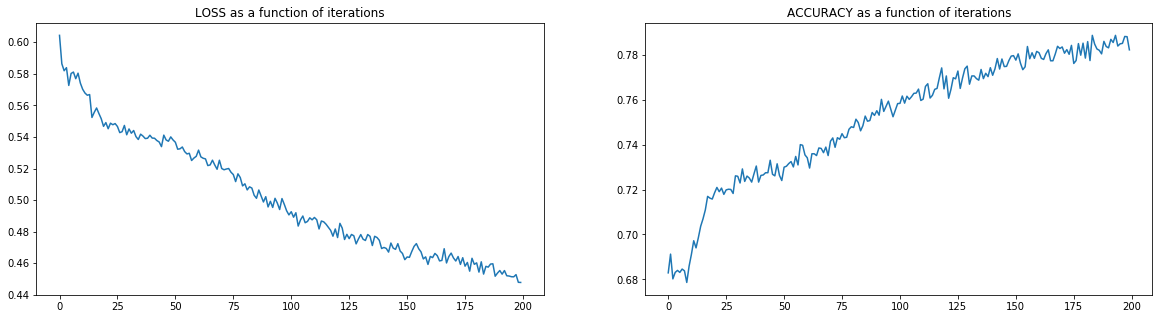

In [10]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 15), 
                 activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Flatten())
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

train_and_test(conv_model, X_train, Y_train, X_val, Y_val, 200, 32, False)

TRAINING
Loss at last iteration: 0.5318649090663576
Accuracy at last iteration: 0.7305168986320496
Training time: 553.0175004005432

TEST
2516/2516 [==============================] - 0s 146us/step
Loss: 0.5374153021882941
Accuracy: 0.7289348170753503


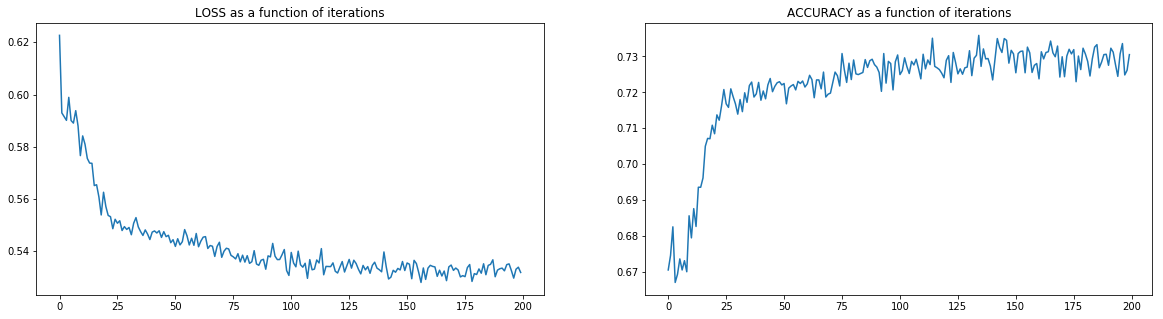

In [11]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 15), 
                 activation = 'relu'))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train and evaluate
train_and_test(conv_model, X_train, Y_train, X_val, Y_val, 200, 32, False)

TRAINING
Loss at last iteration: 0.5133692005401104
Accuracy at last iteration: 0.7463220675944334
Training time: 518.3847432136536

TEST
2516/2516 [==============================] - 0s 149us/step
Loss: 0.5525188905635585
Accuracy: 0.7142289346276481


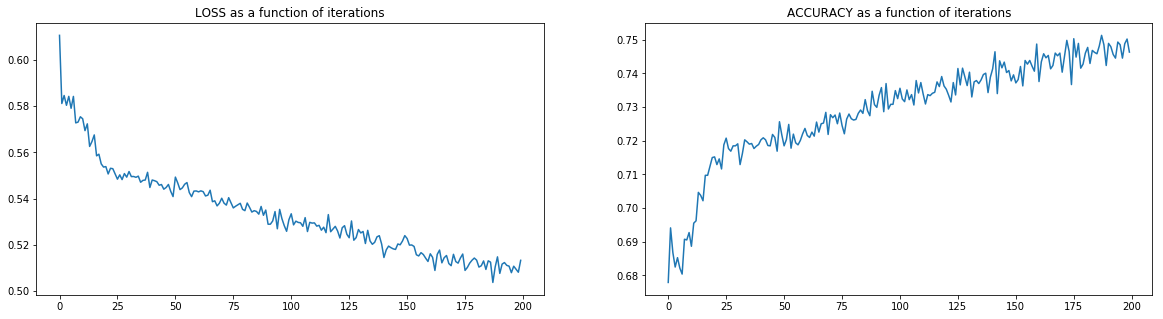

In [12]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 10), 
                 activation = 'relu'))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train and evaluate
train_and_test(conv_model, X_train, Y_train, X_val, Y_val, 200, 32, False)

TRAINING
Loss at last iteration: 0.4590449471004441
Accuracy at last iteration: 0.7887673956262425
Training time: 694.525865316391

TEST
2516/2516 [==============================] - 0s 156us/step
Loss: 0.5575046748254561
Accuracy: 0.7066772654060339


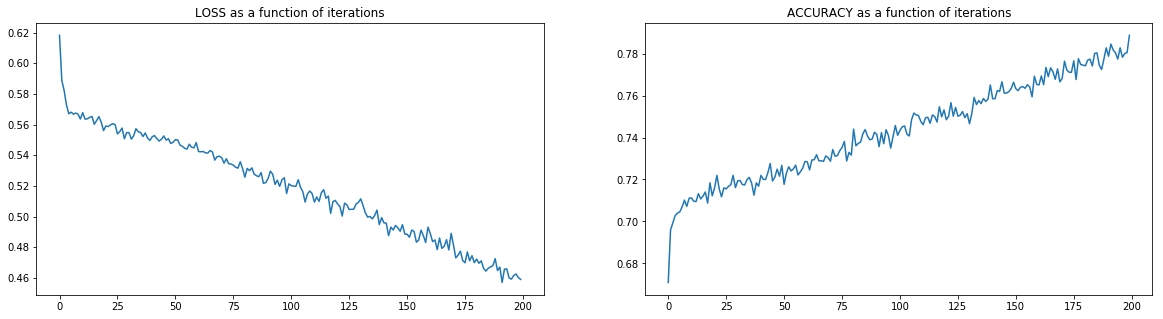

In [13]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 10), 
                 activation = 'relu'))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train and evaluate
train_and_test(conv_model, X_train, Y_train, X_val, Y_val, 200, 32, False)

TRAINING
Loss at last iteration: 0.413885758079544
Accuracy at last iteration: 0.8038767395863239
Training time: 698.3310177326202

TEST
2516/2516 [==============================] - 0s 164us/step
Loss: 0.5837584820195487
Accuracy: 0.7174085849608829


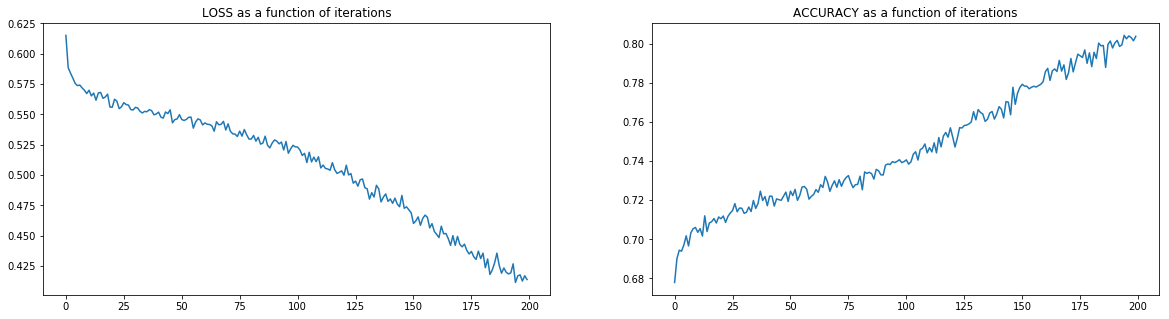

In [14]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 10), 
                 activation = 'relu'))
MaxPooling2D(pool_size=(1, 2))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train and evaluate
train_and_test(conv_model, X_train, Y_train, X_val, Y_val, 200, 32, False)

TRAINING
Loss at last iteration: 0.5299139825060638
Accuracy at last iteration: 0.7328031809382126
Training time: 314.9312801361084

TEST
2516/2516 [==============================] - 0s 148us/step
Loss: 0.5382648006626457
Accuracy: 0.7237678854378304


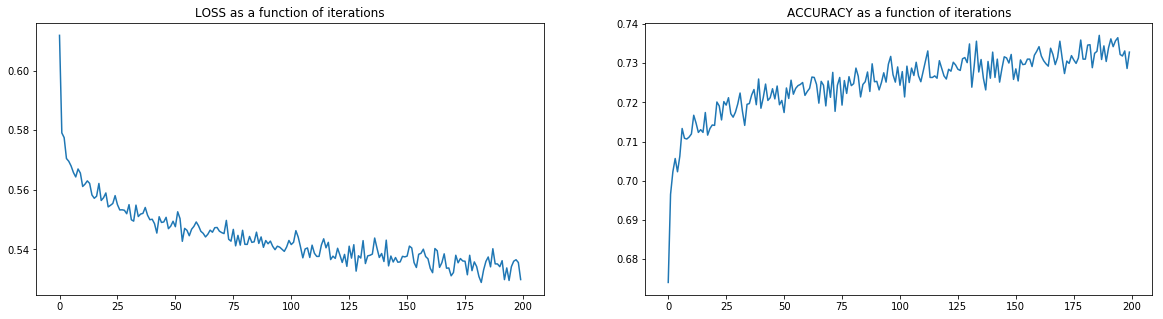

In [15]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 10),
                 strides = (1, 10),
                 activation = 'relu'))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train and evaluate
train_and_test(conv_model, X_train, Y_train, X_val, Y_val, 200, 32, False)

# Second round of training

TRAINING
Loss at last iteration: 0.4257083402713298
Accuracy at last iteration: 0.7910536779324056
Training time: 639.9969544410706

TEST
2516/2516 [==============================] - 0s 176us/step
Loss: 0.6235261687413687
Accuracy: 0.7094594592699376


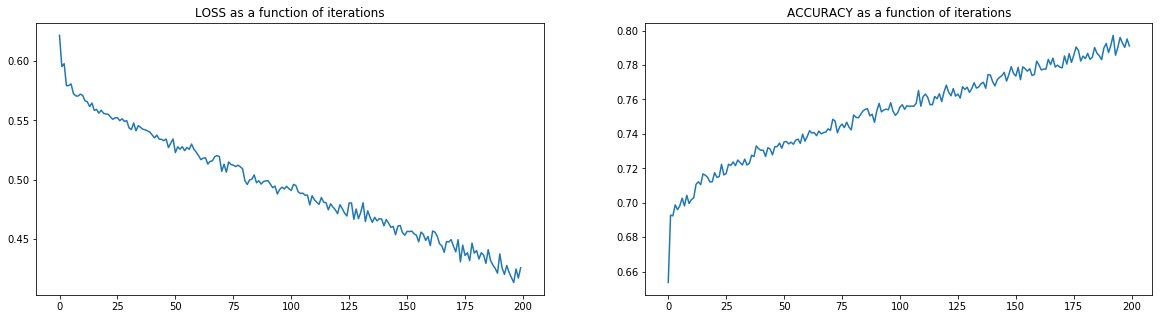

In [16]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 32, 
                 kernel_size = (11, 10), 
                 activation = 'relu',
                 strides = (1, 2)))
conv_model.add(Dropout(0.5))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train and evaluate
train_and_test(conv_model, X_train, Y_train, X_val, Y_val, 200, 32, False)

TRAINING
Loss at last iteration: 0.43484330311210206
Accuracy at last iteration: 0.7783300199044154
Training time: 844.8984825611115

TEST
2516/2516 [==============================] - 0s 196us/step
Loss: 0.6447420775511307
Accuracy: 0.7062798093157466


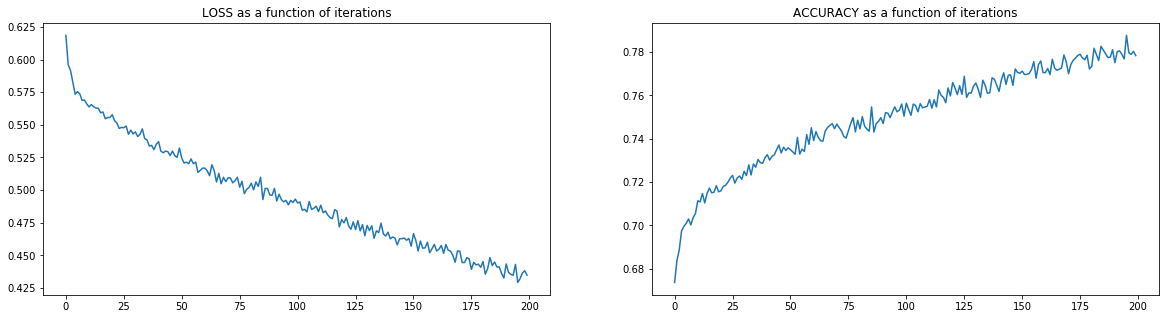

In [17]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 48, 
                 kernel_size = (11, 10), 
                 activation = 'relu',
                 strides = (1, 2)))
conv_model.add(Dropout(0.5))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train and evaluate
train_and_test(conv_model, X_train, Y_train, X_val, Y_val, 200, 32, False)

TRAINING
Loss at last iteration: 0.5253863027271172
Accuracy at last iteration: 0.7348906560399187
Training time: 650.3786256313324

TEST
2516/2516 [==============================] - 0s 191us/step
Loss: 0.5462906935825257
Accuracy: 0.7253577105570673


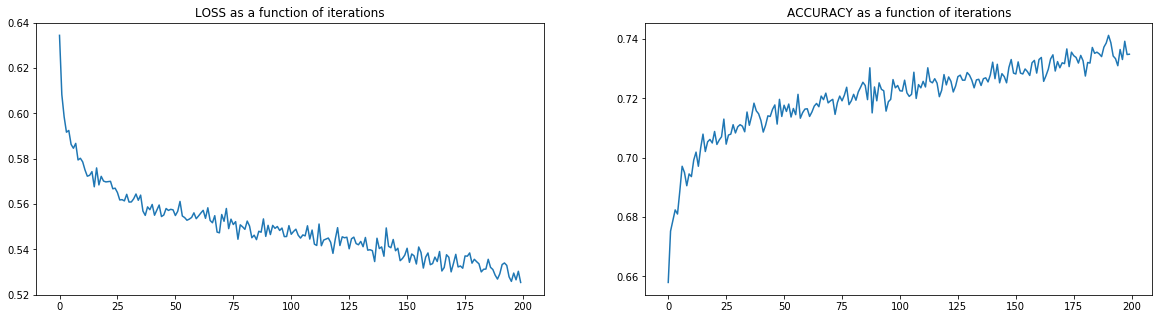

In [18]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 32, 
                 kernel_size = (11, 10), 
                 activation = 'relu',
                 strides = (1, 2)))
conv_model.add(Dropout(0.7))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, 
                     activation = 'relu'))
conv_model.add(Dropout(0.7))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train and evaluate
train_and_test(conv_model, X_train, Y_train, X_val, Y_val, 200, 32, False)

TRAINING
Loss at last iteration: 0.4748073151168482
Accuracy at last iteration: 0.7665009940120856
Training time: 655.8193316459656

TEST
2516/2516 [==============================] - 1s 200us/step
Loss: 0.5923370436568328
Accuracy: 0.715818759841646


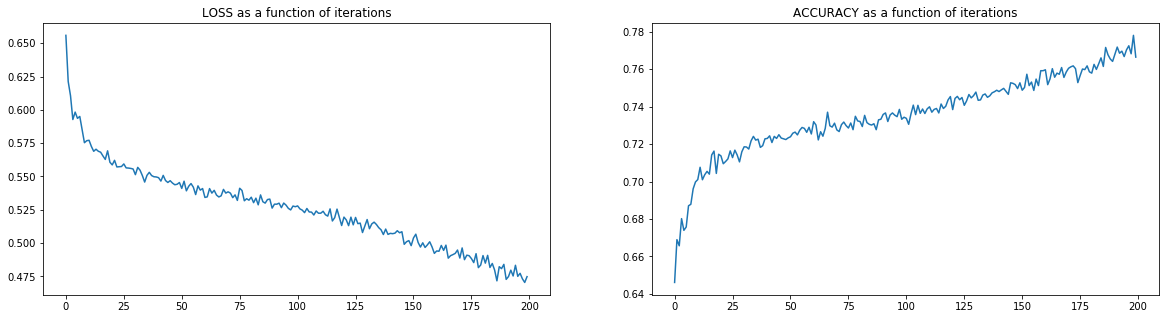

In [19]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 32, 
                 kernel_size = (11, 10), 
                 activation = 'relu',
                 strides = (1, 2)))
conv_model.add(Dropout(0.6))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, 
                     activation = 'relu'))
conv_model.add(Dropout(0.6))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train and evaluate
train_and_test(conv_model, X_train, Y_train, X_val, Y_val, 200, 32, False)

TRAINING
Loss at last iteration: 0.478666006215287
Accuracy at last iteration: 0.7667992047713718
Training time: 676.5306694507599

TEST
2516/2516 [==============================] - 1s 208us/step
Loss: 0.5890465089266554
Accuracy: 0.7197933226397383


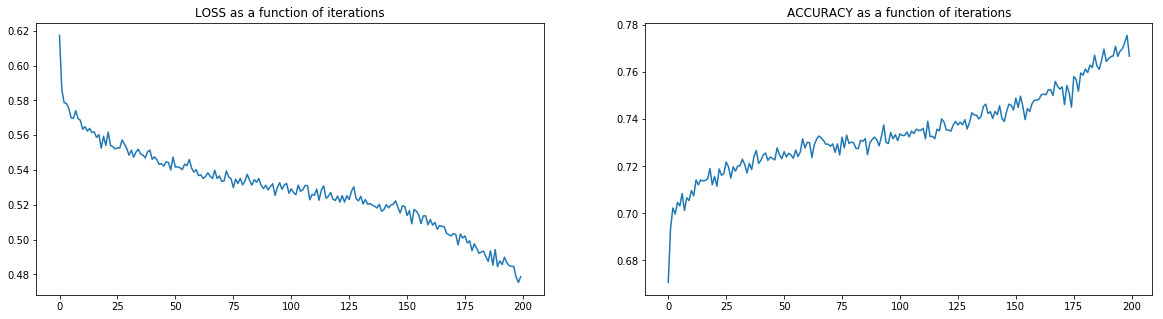

In [20]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 32, 
                 kernel_size = (11, 10), 
                 activation = 'relu',
                 strides = (1, 2)))
conv_model.add(Dropout(0.5))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, 
                     activation = 'relu', 
                     kernel_constraint=max_norm(4.)))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train and evaluate
train_and_test(conv_model, X_train, Y_train, X_val, Y_val, 200, 32, False)

TRAINING
Loss at last iteration: 0.41055437469814215
Accuracy at last iteration: 0.8025844930417495
Training time: 412.27102279663086

TEST
2516/2516 [==============================] - 1s 199us/step
Loss: 0.611866209199963
Accuracy: 0.7197933229240211


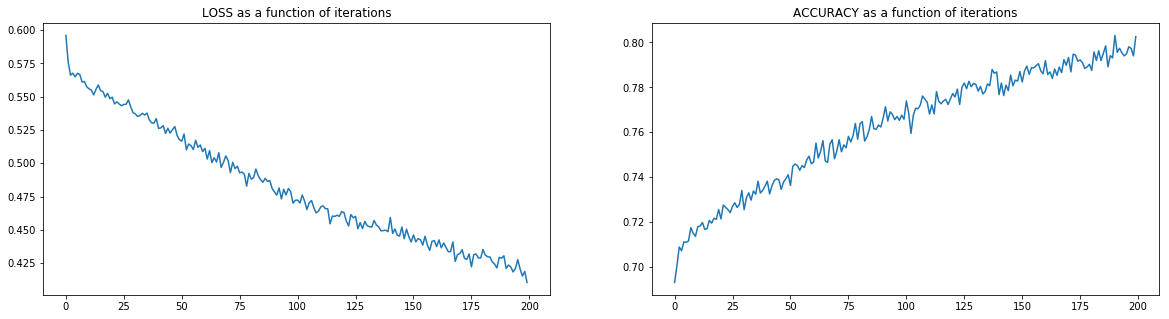

In [21]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 32, 
                 kernel_size = (11, 10), 
                 activation = 'relu',
                 strides = (1, 5)))
conv_model.add(Dropout(0.5))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, 
                     activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train and evaluate
train_and_test(conv_model, X_train, Y_train, X_val, Y_val, 200, 32, False)

TRAINING
Loss at last iteration: 0.43098095055839886
Accuracy at last iteration: 0.7901590457256461
Training time: 506.42737102508545

TEST
2516/2516 [==============================] - 1s 227us/step
Loss: 0.5911386235719265
Accuracy: 0.715818759936407


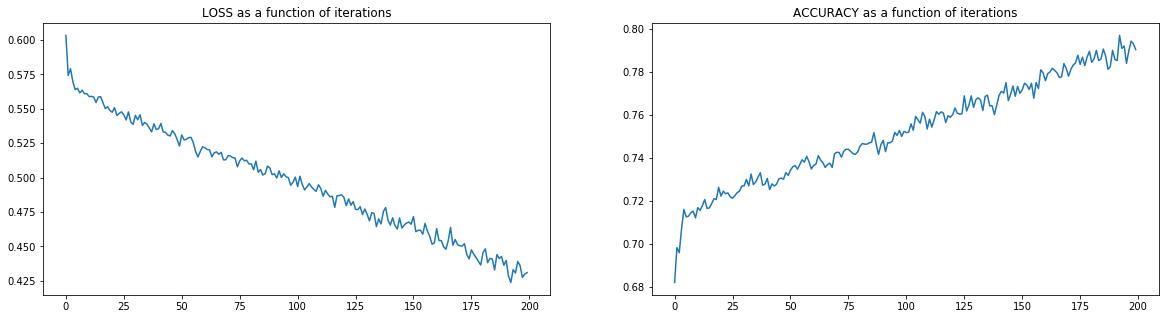

In [22]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 32, 
                 kernel_size = (11, 10), 
                 activation = 'relu',
                 strides = (1, 3)))
conv_model.add(Dropout(0.5))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, 
                     activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train and evaluate
train_and_test(conv_model, X_train, Y_train, X_val, Y_val, 200, 32, False)

TRAINING
Loss at last iteration: 0.6854323091611236
Accuracy at last iteration: 0.5623260437257247
Training time: 571.338788986206

TEST
2516/2516 [==============================] - 1s 231us/step
Loss: 0.6833564336804024
Accuracy: 0.5703497614788516


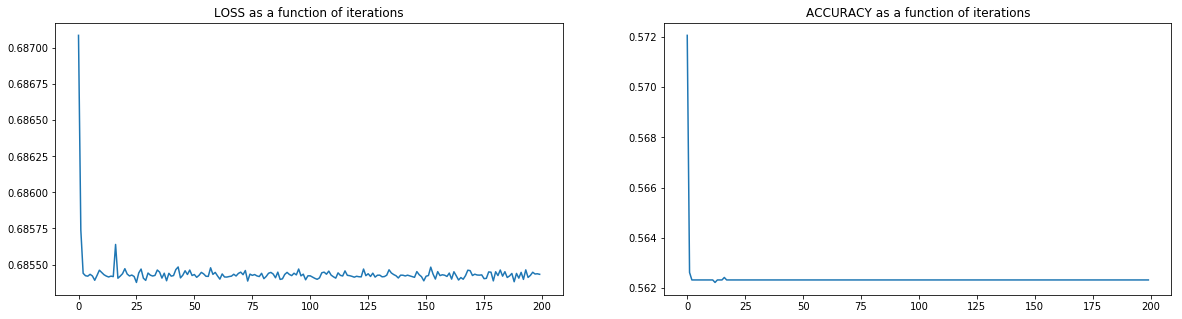

In [23]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 32, 
                 kernel_size = (11, 10), 
                 activation = 'relu',
                 strides = (1, 2)))
conv_model.add(Dropout(0.5))
conv_model.add(Flatten())
conv_model.add(Dense(units = 25, 
                     activation = 'relu',
                     activity_regularizer=regularizers.l2(0.001)))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train and evaluate
train_and_test(conv_model, X_train, Y_train, X_val, Y_val, 200, 32, False)

# With More Features

In [ ]:
X_train_pd = feature_engineering(X_train_pd, two_points = True)

In [7]:
X_train, Y_train, X_val, Y_val = split_train_val(X_train_pd, Y_train_pd, 0.8)

nb_games_train, col = X_train.shape
nb_games_val,_  = X_val.shape
nb_features = 18

del X_train_pd, Y_train_pd

In [8]:
X_train = X_train.reshape((nb_games_train, 18, 1440, 1), order = 'F')
X_val = X_val.reshape((nb_games_val, 18, 1440, 1), order = 'F')

In [35]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (18, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (18, 10), 
                 activation = 'relu'))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])
training = conv_model.fit(X_train, np_utils.to_categorical(Y_train), 
                       validation_data = (X_val, np_utils.to_categorical(Y_val)),
                       epochs = 10, batch_size = 32, verbose = True)

Train on 10060 samples, validate on 2516 samples
Epoch 1/10
10060/10060 [==============================] - 6s 549us/step - loss: 0.6213 - acc: 0.6645 - val_loss: 0.5428 - val_acc: 0.7154
Epoch 2/10
10060/10060 [==============================] - 5s 479us/step - loss: 0.5885 - acc: 0.6918 - val_loss: 0.5429 - val_acc: 0.7138
Epoch 3/10
10060/10060 [==============================] - 5s 477us/step - loss: 0.5832 - acc: 0.6959 - val_loss: 0.5322 - val_acc: 0.7218
Epoch 4/10
10060/10060 [==============================] - 5s 479us/step - loss: 0.5709 - acc: 0.7077 - val_loss: 0.5338 - val_acc: 0.7254
Epoch 5/10
10060/10060 [==============================] - 5s 494us/step - loss: 0.5705 - acc: 0.7095 - val_loss: 0.5235 - val_acc: 0.7281
Epoch 6/10
10060/10060 [==============================] - 5s 496us/step - loss: 0.5595 - acc: 0.7118 - val_loss: 0.5247 - val_acc: 0.7297
Epoch 7/10
10060/10060 [==============================] - 5s 474us/step - loss: 0.5504 - acc: 0.7187 - val_loss: 0.5509 - v

In [36]:
import keras.backend as K

extract_cnn_features = K.function([conv_model.layers[0].input, K.learning_phase()],
                                    [conv_model.layers[5].output])

X_train_features = extract_cnn_features([X_train, 0])[0]
X_val_features = extract_cnn_features([X_val, 0])[0]

Text(0.5,1,'Validation')

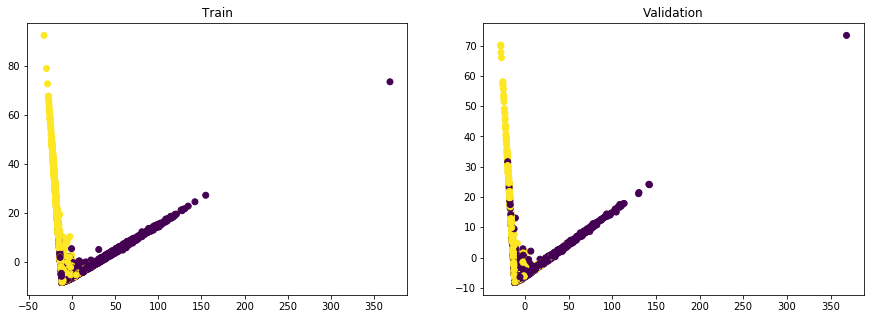

In [37]:
from sklearn.decomposition import PCA


proj = PCA(n_components = 2)
X_proj = proj.fit_transform(X_train_features)

f, (ax1, ax2) = plt.subplots(1,2, figsize= (15,5))
ax1.scatter(X_proj[:,0], X_proj[:,1], c= Y_train.ravel())
ax1.set_title('Train')
X_proj = proj.transform(X_val_features)
ax2.scatter(X_proj[:,0], X_proj[:,1], c= Y_val.ravel())
ax2.set_title('Validation')

In [38]:
proj.explained_variance_ratio_

array([0.7228514 , 0.15040007], dtype=float32)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

params = {'n_estimators': 100, 'max_depth': 20, 'min_samples_leaf': 2}
clf = RandomForestClassifier(**params)
# clf = LogisticRegression(C=0.01)
# clf = SVC(kernel = 'rbf')

clf.fit(X_train_features, Y_train.ravel())
print(clf.score(X_train_features, Y_train.ravel()), clf.score(X_val_features, Y_val.ravel()))

0.8713717693836978 0.7325119236883942


Text(0.5,1,'Validation - Prediction')

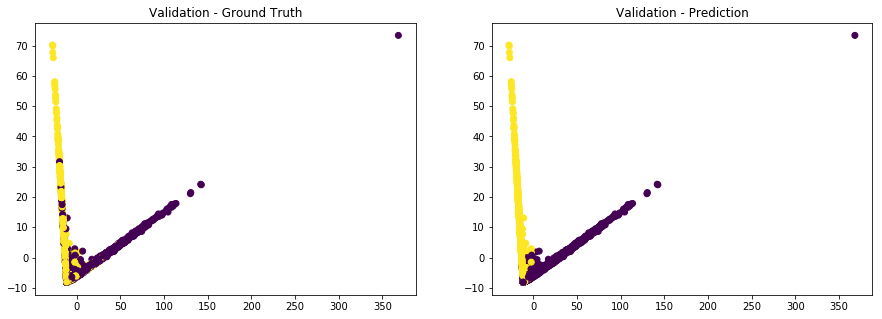

In [47]:
f, (ax1, ax2) = plt.subplots(1,2, figsize= (15,5))
ax1.scatter(X_proj[:,0], X_proj[:,1], c= Y_val.ravel())
ax1.set_title('Validation - Ground Truth')
X_proj = proj.transform(X_val_features)
ax2.scatter(X_proj[:,0], X_proj[:,1], c= clf.predict(X_val_features))
ax2.set_title('Validation - Prediction')

In [48]:
conv_model.save('models/cnn_2303.h5')

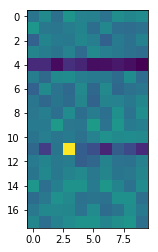

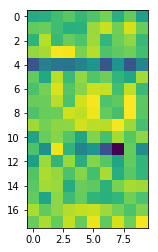

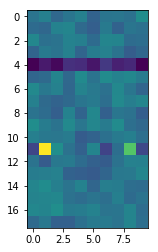

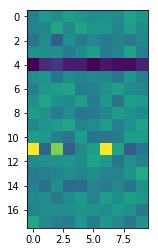

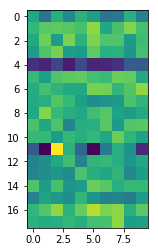

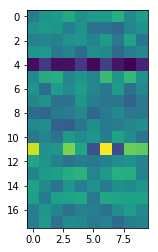

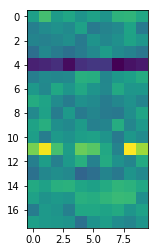

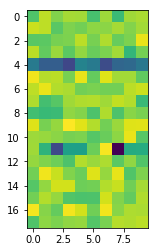

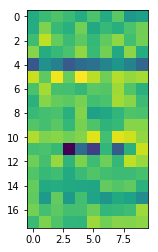

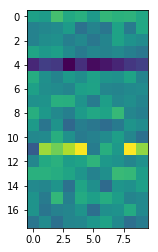

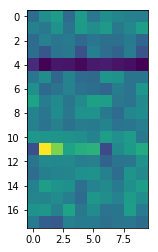

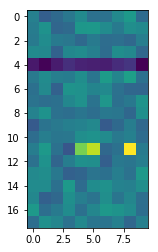

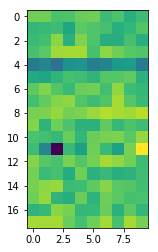

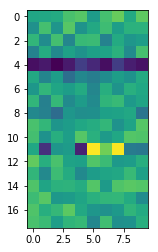

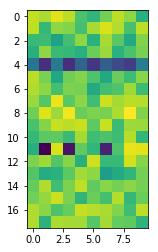

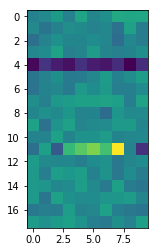

In [65]:
for i in range(16):
    plt.imshow(conv_model.layers[1].get_weights()[0][:, :, :, i].reshape((18,10)))
    plt.show()